In [1]:
%matplotlib inline


import numpy as np # the Python array package
import matplotlib.pyplot as plt  # the Python plotting package
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting 

import pandas as pd

In [2]:
onsets_1back = np.array([4, 72, 140, 208, 276, 344, 412, 480, 548, 616])
onsets_2back = np.array([38, 106, 174, 242, 310, 378, 446, 514, 582, 650])

onsets_nback = sorted(np.concatenate((onsets_1back, onsets_2back), axis = 0))
vol_num = 340

TR = 2
duration = 30

vectors_blocks = np.zeros((vol_num, len(onsets_nback)))



In [3]:
for i in range(len(onsets_nback)):
    vector = np.zeros(vol_num)
    start = int(onsets_nback[i]/TR)
    stop = start + int(duration/TR)
    vector[start:stop] = 1       
    vectors_blocks[:,i] = vector


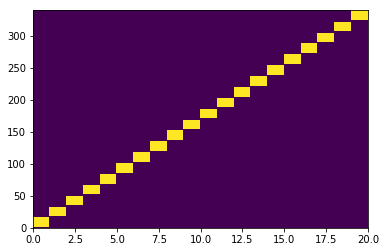

In [4]:
#plt.plot(vectors_blocks)

plt.pcolormesh(vectors_blocks)
plt.show()

In [5]:
vectors_blocks = vectors_blocks.astype('bool')

In [6]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'

In [7]:
timeseries = np.load(top_dir + 'LearningBrain_dualnback_timeseries_lp_0.08_aCompCor_power.npy')

timeseries.shape

(46, 4, 340, 264)

In [8]:
n_sub = len(timeseries[:, 0, 0, 0 ])
n_ses = len(timeseries[0, :, 0, 0 ])
n_roi = len(timeseries[0, 0, 0, : ])
n_win = len(vectors_blocks[0,:])

correlation_matrices_dFC = np.zeros((n_sub, n_ses, n_win, n_roi, n_roi))


for i in range(n_sub):
    for j in range(n_ses):
        for k in range(n_win):
            window_timeseries = timeseries[i, j, vectors_blocks[:, k], :]
            correlation_measure = ConnectivityMeasure(kind = 'correlation')
            window_matrix = correlation_measure.fit_transform([window_timeseries])[0]
            np.fill_diagonal(window_matrix, 0)
            correlation_matrices_dFC[i, j, k, :, :] = window_matrix 

               


In [9]:
correlation_matrices_dFC.shape


(46, 4, 20, 264, 264)

46

In [173]:
correlation_matrices_dFC.shape

(46, 4, 20, 264, 264)

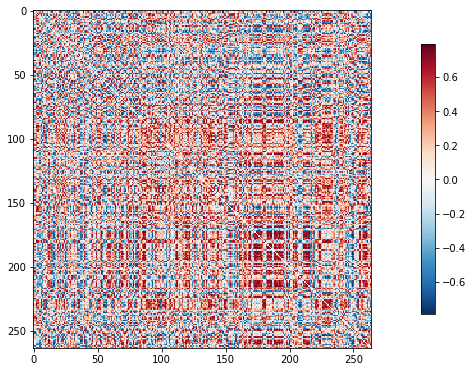

In [21]:
plotting.plot_matrix(correlation_matrices_dFC[0, 0, 5, :, :])

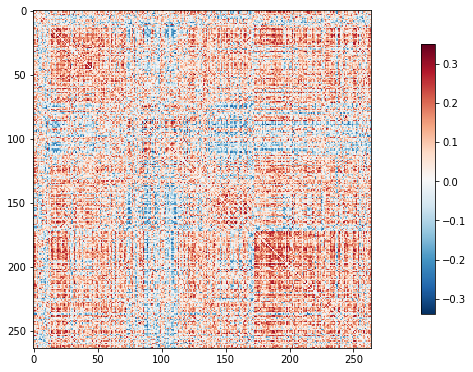

In [155]:
plotting.plot_matrix(correlation_matrices_dFC[1, 0, 14, :, :])

In [23]:
np.save(top_dir + 'LearningBrain_dFC_matrices_dualnback.npy', correlation_matrices_dFC)      

In [142]:
# Selecting subjects who finished the study

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]

#trained_subs.drop(['sub-23'], axis = 0)
#trained_subs[trained_subs.sub != 'sub-23']


#experimental = (trained_subs == 'Experimental')
#trained_subs = groups[trained]['sub']
#subs = pd.Series.tolist(trained_subs)
#subs.remove('sub-23')

#experimental['group'][22] == False

#experimental['group']

trained_subs

#trained_subs.index[22]

trained_subs = trained_subs[trained_subs['sub'] != 'sub-23']
experimental = (trained_subs == 'Experimental')

In [148]:
experimental

[False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 False,
 True]

In [157]:
corr_dFC_experimental = correlation_matrices_dFC[experimental,:,:,:,:]

In [159]:
corr_dFC_experimental.shape

(22, 4, 20, 264, 264)

In [24]:
import scipy.io as sio

sio.savemat(top_dir + 'LearningBrain_dFC_matrices_dualnback.mat', {'correlation_matrices_dFC': correlation_matrices_dFC})


In [158]:
sio.savemat(top_dir + 'corr_dFC_experimental.mat', {'corr_dFC_experimental': corr_dFC_experimental})


In [61]:
correlarion_matrices_dFC.shape

(3, 4, 20, 264, 264)